<a href="https://colab.research.google.com/github/htdung167/SVM-kernels/blob/main/KernelSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>
  <font size='+3'>
    <b>
      Lập trình Python cho máy học - CS116.M11
    </b>
  </font>
  <br>
  <font size='+4'>
    <b>
      Kernel SVM
    </b>
  </font>
</h1>

#**Thông tin**

1. Giảng viên hướng dẫn: TS. Nguyễn Vinh Tiệp
2. Lớp: CS116.M11
2. Thành viên:
- Hoàng Tiến Dũng - 19521388
- Nguyễn Thành Trọng - 19522410

#**I. Cài đặt thư viện, hàm, dữ liệu cần thiết**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score
from time import time
from sklearn.svm import SVC

In [ ]:
os.chdir("/content/drive/MyDrive/CS116_Nhóm")

In [ ]:
path_data = os.path.join("/content/drive/MyDrive/CS116_Nhóm", "Data")
path_training = os.path.join(path_data, "Training")
path_validation = os.path.join(path_data, "Validation")
path_train_female = os.path.join(path_training, "female")
path_train_male = os.path.join(path_training, "male")
path_val_female = os.path.join(path_validation, "female")
path_val_male = os.path.join(path_validation, "male")

In [ ]:
# !unzip "./Data/archive.zip"

In [ ]:
def VisualImages(lst_image, lst_title=None):
    plt.figure(figsize=(15,15))
    plt.axis("off")
    n = len(lst_image)
    if lst_title==None:
        for i in range(n):
            plt.subplot(1, n, i+1)
            lst_image[i] = cv.cvtColor(lst_image[i], cv.COLOR_BGR2RGB)
            lst_image[i] = plt.imshow(lst_image[i], interpolation="bicubic")
    else:
        for i in range(n):
            plt.subplot(1, n, i+1)
            lst_image[i] = cv.cvtColor(lst_image[i], cv.COLOR_BGR2RGB)
            lst_image[i] = plt.imshow(lst_image[i], interpolation="bicubic")
            plt.title(lst_title[i])
    plt.show()

#**II. Dữ liệu ban đầu**

##**1. Thống kê số lượng**

In [ ]:
def ThongKe_Rieng(path):
  male_path = os.path.join(path, "male")
  female_path = os.path.join(path, "female")
  count_male = 0
  count_female = 0
  for img in os.listdir(male_path):
    print(os.path.join(male_path, img))
    count_male += 1
  for img in os.listdir(female_path):
    print(os.path.join(female_path, img))
    count_female += 1
  return count_male, count_female
def ThongKe_Chung(path):
  train_path = os.path.join(path, "Training")
  val_path = os.path.join(path, "Validation")
  lst_res = []
  lst_res.append(ThongKe_Rieng(train_path))
  lst_res.append(ThongKe_Rieng(val_path))
  return lst_res

In [ ]:
[count_train_male, count_train_female], [count_val_male, count_val_female] = ThongKe_Chung("./Data")

In [ ]:
print("Training:")
print("    + Male: " + str(count_train_male) + " ảnh")
print("    + Female: "+ str(count_train_female) + " ảnh")
print("Validation:")
print("    + Male: "+ str(count_val_male) + " ảnh")
print("    + Female: "+ str(count_val_female) + " ảnh")

Training:
    + Male: 23766 ảnh
    + Female: 23243 ảnh
Validation:
    + Male: 4074 ảnh
    + Female: 5841 ảnh


##**2. Thông tin ảnh ban đầu**

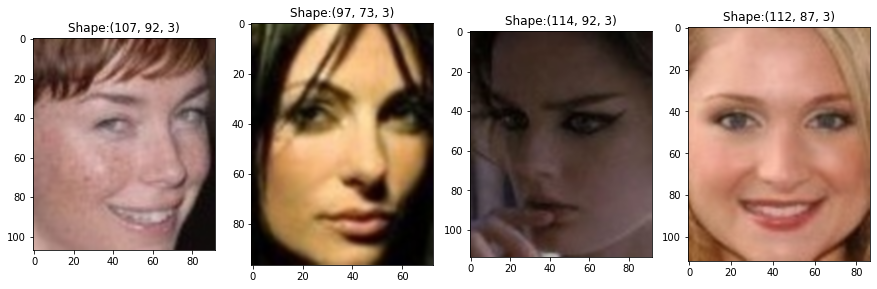

In [ ]:
lst_img_train_female = os.listdir(path_train_female)
images = []
titles = []
for img_file in lst_img_train_female[:4]:
  img = cv.imread(os.path.join(path_train_female, img_file))
  images.append(img)
  titles.append("Shape:" + str(img.shape))
VisualImages(images, titles)

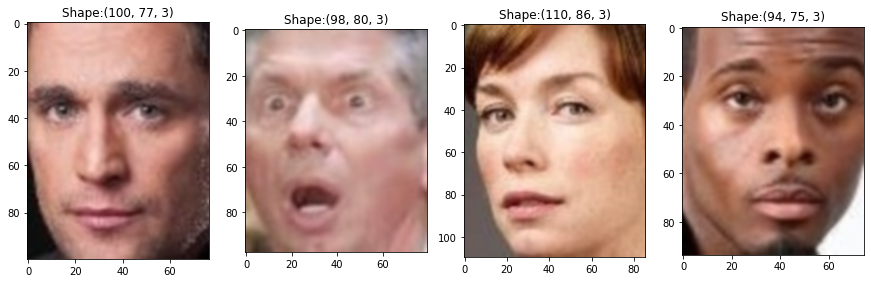

In [ ]:
lst_img = os.listdir(path_train_male)
images = []
titles = []
for img_file in lst_img[:4]:
  img = cv.imread(os.path.join(path_train_male, img_file))
  images.append(img)
  titles.append("Shape:" + str(img.shape))
VisualImages(images, titles)

###**Nhận xét: Các ảnh ban đầu là ảnh BGR có số chiều khác nhau**

In [ ]:
img = img.flatten() 
images.append(img)
genders.append(gender)

#**III. Xử lý đặc trưng ảnh đầu vào**

In [ ]:
def GetFeature(path_trainval):
  trainval_dir = os.listdir(path_trainval)
  images = []
  genders = []
  for gender in trainval_dir:
    imgs_dir = os.path.join(path_trainval, gender)
    img_files = os.listdir(imgs_dir)
    for img_file in img_files:
      t = os.path.join(imgs_dir, img_file)
      print(t)
      try:
        img = cv.imread(t, 0) #Đọc ảnh và chuyển thành ảnh mức xám
        img = cv.resize(img, (60,80)) #Resize ảnh về rộng 60, cao 80
        img = img/255 #Vì màu nằm trong khoảng 0 đến 255 nên ta chia cho 255
        img = img.flatten() #Làm phẳng ma trận ảnh
        images.append(img)
        genders.append(gender)
      except:
        print("*************************" + t)
  images = np.array(images)
  genders = np.array(genders)
  return images, genders

In [ ]:
X_train_raw, y_train_raw = GetFeature(path_training)
X_test_raw, y_test_raw = GetFeature(path_validation)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/124877.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/120362.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/119244.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/118621.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/119968.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/122305.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/119555.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/120098.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/122788.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/122413.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/119226.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/118910.jpg.jpg
/content/drive/MyDrive/CS116_Nhóm/Data/Validation/female/122560.jp

In [ ]:
print(X_train_raw.shape)
print(X_test_raw.shape)
print(y_train_raw.shape)
print(y_test_raw.shape)

(47009, 4800)
(9915, 4800)
(47009,)
(9915,)


In [ ]:
np.save("x_train_raw.npy", X_train_raw)
np.save("y_train_raw.npy", y_train_raw)
np.save("x_test_raw.npy", X_test_raw)
np.save("y_test_raw.npy", y_test_raw)

#**IV. Chia dữ liệu để thực hiện đồ án**

In [ ]:
os.chdir("/content/drive/MyDrive/CS116_Nhóm")

In [ ]:
X_ = np.load("x_train_raw.npy")
y_ = np.load("y_train_raw.npy")
X_test = np.load("x_test_raw.npy")
y_test = np.load("y_test_raw.npy")

In [ ]:
from sklearn.model_selection import train_test_split
X_data, _, y_data, _ = train_test_split(X_, y_, test_size=0.8, random_state=0)

In [ ]:
X_data.shape

(9401, 4800)

In [ ]:
X_data_t, _, y_data_t, _ = train_test_split(X_test, y_test, test_size=0.8, random_state=0)

In [ ]:
X_data_t.shape

(1983, 4800)

In [ ]:
np.unique(y_data, return_counts=True)

(array(['female', 'male'], dtype='<U6'), array([4681, 4720]))

In [ ]:
np.unique(y_data_t, return_counts=True)

(array(['female', 'male'], dtype='<U6'), array([1179,  804]))

In [ ]:
np.save("x.npy", X_data)
np.save("y.npy", y_data)

In [ ]:
np.save("x_t.npy", X_data_t)
np.save("y_t.npy", y_data_t)

#**V. Cài đặt và huấn luyện SVM với các Kernel**

##**1. Dữ liệu đầu vào**

###**Load dữ liệu**

In [ ]:
os.chdir("/content/drive/MyDrive/CS116_Nhóm")

In [ ]:
X_train = np.load("x.npy")
y_train = np.load("y.npy")
X_test = np.load("x_t.npy")
y_test = np.load("y_t.npy")

In [ ]:
X_train.shape

(9401, 4800)

In [ ]:
X_test.shape

(1983, 4800)

###**Sử dụng PCA để giảm chiều dữ liệu**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)

In [ ]:

pca.fit(X_train)

PCA(n_components=16)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

##**2. Cài đặt, huấn luyện và đánh giá SVM với các Kernel**

###**a. Linear**

In [ ]:
from sklearn.metrics import accuracy_score
from time import time

In [ ]:
from sklearn.svm import SVC

In [ ]:
def linearSVM(c):
  linear_model = SVC(C=c, kernel="linear")
  t0 = time()
  linear_model.fit(X_train_pca, y_train)
  tt = time() - t0
  print("Linear, c =", c)
  print("    + Time training: ", tt)
  y_test_pred = linear_model.predict(X_test_pca)
  acc_test = accuracy_score(y_test, y_test_pred)
  print("    + Accuracy of Test:", acc_test)
  return tt, acc_test

In [ ]:
for i in [0.001, 0.01, 0.1, 1, 10, 50]:
  linearSVM(i)

Linear, c = 0.001
    + Time training:  3.4191157817840576
    + Accuracy of Test: 0.7327281896116995
Linear, c = 0.01
    + Time training:  3.874345302581787
    + Accuracy of Test: 0.7377710539586485
Linear, c = 0.1
    + Time training:  6.387974739074707
    + Accuracy of Test: 0.7402924861321231
Linear, c = 1
    + Time training:  18.49185562133789
    + Accuracy of Test: 0.7397881996974282
Linear, c = 10
    + Time training:  100.47394609451294
    + Accuracy of Test: 0.7402924861321231
Linear, c = 50
    + Time training:  404.03830194473267
    + Accuracy of Test: 0.7402924861321231


In [ ]:
linearSVM(10**-9)

Linear, c = 1e-09
    + Time training:  4.760849952697754
    + Accuracy of Test: 0.405446293494705


(4.760849952697754, 0.405446293494705)

###**b. Poly**

In [ ]:
from sklearn.metrics import accuracy_score
from time import time
from sklearn.svm import SVC

def polySVM(c, degree, gamma, coef):
  print("Poly, c ="+ str(c) + ", degree=" + str(degree) + ", gamma=" + str(gamma) + ", coef0=" + str(coef))
  poly_model = SVC(C=c, kernel="poly", degree=degree, gamma=gamma, coef0=coef)
  t0 = time()
  poly_model.fit(X_train_pca, y_train)
  tt = time() - t0 
  print("    + Time training: ", tt)
  y_test_pred = poly_model.predict(X_test_pca)
  acc_test = accuracy_score(y_test, y_test_pred)
  print("    + Accuracy of Test:", acc_test)
  return tt, acc_test

In [ ]:
poly_parameters = {
    'C': [0.01, 0.1, 1, 5],
    'gamma': ['auto', 'scale', 0.01, 0.1, 1,2],
    'degree': [1,2,3],
    'coef0': np.logspace(-3, 3, 5).tolist()
}

In [ ]:
for degree in [0,1,2,3,10, 15]:
  polySVM(1, degree, 'scale', 0)

Poly, c =1, degree=0, gamma=scale, coef0=0
    + Time training:  2.8366966247558594
    + Accuracy of Test: 0.405446293494705
Poly, c =1, degree=1, gamma=scale, coef0=0
    + Time training:  3.1668930053710938
    + Accuracy of Test: 0.7377710539586485
Poly, c =1, degree=2, gamma=scale, coef0=0
    + Time training:  3.8035755157470703
    + Accuracy of Test: 0.7009581442259203
Poly, c =1, degree=3, gamma=scale, coef0=0
    + Time training:  4.591506004333496
    + Accuracy of Test: 0.7604639435199193
Poly, c =1, degree=10, gamma=scale, coef0=0
    + Time training:  9.720415592193604
    + Accuracy of Test: 0.6585980837115482
Poly, c =1, degree=15, gamma=scale, coef0=0
    + Time training:  11.278130531311035
    + Accuracy of Test: 0.6469994957135653


In [ ]:
for degree in poly_parameters['degree']:
  for gamma in poly_parameters['gamma']:
    for c in poly_parameters['C']:
      for coef in poly_parameters['coef0']:
        polySVM(c, degree, gamma, coef)

Poly, c =0.01, degree=1, gamma=auto, coef0=0.001
    + Time training:  3.082871198654175
    + Accuracy of Test: 0.7317196167423097
Poly, c =0.01, degree=1, gamma=auto, coef0=0.03162277660168379
    + Time training:  3.03790020942688
    + Accuracy of Test: 0.7317196167423097
Poly, c =0.01, degree=1, gamma=auto, coef0=1.0
    + Time training:  3.0496768951416016
    + Accuracy of Test: 0.7317196167423097
Poly, c =0.01, degree=1, gamma=auto, coef0=31.622776601683793
    + Time training:  3.067920446395874
    + Accuracy of Test: 0.7317196167423097
Poly, c =0.01, degree=1, gamma=auto, coef0=1000.0
    + Time training:  3.0098400115966797
    + Accuracy of Test: 0.7317196167423097
Poly, c =0.1, degree=1, gamma=auto, coef0=0.001
    + Time training:  3.1472713947296143
    + Accuracy of Test: 0.7367624810892587
Poly, c =0.1, degree=1, gamma=auto, coef0=0.03162277660168379
    + Time training:  3.092543601989746
    + Accuracy of Test: 0.7367624810892587
Poly, c =0.1, degree=1, gamma=auto, 

###**c. RBF**

In [ ]:
def rbfSVM(c, gamma):
  rbf_model = SVC(C=c, kernel='rbf', gamma=gamma)
  t0 = time()
  rbf_model.fit(X_train_pca, y_train)
  tt = time() - t0
  print("RBF, c =" +str(c) + ", gamma=" + str(gamma))
  print("    + Time training: ", tt)
  y_test_pred = rbf_model.predict(X_test_pca)
  acc_test = accuracy_score(y_test, y_test_pred)
  print("    + Accuracy of Test:", acc_test)
  return tt, acc_test

In [ ]:
rbf_parameters = {
    'C': [0.01, 0.1, 1, 5],
    'gamma': ['auto', 'scale', 0.01, 0.1, 1, 2],
}

In [ ]:
for gamma in rbf_parameters['gamma']:
  for c in rbf_parameters['C']:
    rbfSVM(c, gamma)

RBF, c =0.01, gamma=auto
    + Time training:  5.9684436321258545
    + Accuracy of Test: 0.4059505799293999
RBF, c =0.1, gamma=auto
    + Time training:  5.510079622268677
    + Accuracy of Test: 0.7125567322239031
RBF, c =1, gamma=auto
    + Time training:  7.456683397293091
    + Accuracy of Test: 0.7902168431669188
RBF, c =5, gamma=auto
    + Time training:  11.032297611236572
    + Accuracy of Test: 0.7801311144730206
RBF, c =0.01, gamma=scale
    + Time training:  5.480340957641602
    + Accuracy of Test: 0.7186081694402421
RBF, c =0.1, gamma=scale
    + Time training:  4.347984313964844
    + Accuracy of Test: 0.7771053958648513
RBF, c =1, gamma=scale
    + Time training:  3.478452205657959
    + Accuracy of Test: 0.8033282904689864
RBF, c =5, gamma=scale
    + Time training:  4.227946996688843
    + Accuracy of Test: 0.8119011598587998
RBF, c =0.01, gamma=0.01
    + Time training:  5.523332357406616
    + Accuracy of Test: 0.7196167423096319
RBF, c =0.1, gamma=0.01
    + Time t

###**d. Sigmoid**

In [ ]:
from sklearn.metrics import accuracy_score
from time import time
from sklearn.svm import SVC

def sigmoidSVM(c, gamma, coef):
  sigmoid_model = SVC(C=c, kernel="sigmoid", gamma=gamma, coef0=coef)
  t0 = time()
  sigmoid_model.fit(X_train_pca, y_train)
  tt = time() - t0
  print("Sigmoid, c ="+ str(c)+ ", gamma=" + str(gamma) + ", coef0=" + str(coef))
  print("    + Time training: ", tt)
  y_test_pred = sigmoid_model.predict(X_test_pca)
  acc_test = accuracy_score(y_test, y_test_pred)
  print("    + Accuracy of Test:", acc_test)
  return tt, acc_test

In [ ]:
sigmoid_parameters = {
    'C': [0.0001,0.001, 0.01, 0.1, 1, 5, 10],
    'gamma': ['auto', 'scale', 0.01, 0.1, 1, 2],
    'coef0': np.logspace(-3, 3, 5).tolist()
}

In [ ]:
for coef in sigmoid_parameters['coef0']:
  sigmoidSVM(0.001, 0.1 , coef)

Sigmoid, c =0.001, gamma=0.1, coef0=0.001
    + Time training:  8.308180332183838
    + Accuracy of Test: 0.6646495209278871
Sigmoid, c =0.001, gamma=0.1, coef0=0.03162277660168379
    + Time training:  8.168808937072754
    + Accuracy of Test: 0.6636409480584973
Sigmoid, c =0.001, gamma=0.1, coef0=1.0
    + Time training:  7.970080137252808
    + Accuracy of Test: 0.6601109430156329
Sigmoid, c =0.001, gamma=0.1, coef0=31.622776601683793
    + Time training:  4.0242321491241455
    + Accuracy of Test: 0.405446293494705
Sigmoid, c =0.001, gamma=0.1, coef0=1000.0
    + Time training:  2.932961940765381
    + Accuracy of Test: 0.405446293494705


In [ ]:
for gamma in sigmoid_parameters['gamma']:
  sigmoidSVM(0.001, gamma , 1)

Sigmoid, c =0.001, gamma=auto, coef0=1
    + Time training:  7.6343934535980225
    + Accuracy of Test: 0.6676752395360565
Sigmoid, c =0.001, gamma=scale, coef0=1
    + Time training:  8.111333131790161
    + Accuracy of Test: 0.5239536056480081
Sigmoid, c =0.001, gamma=0.01, coef0=1
    + Time training:  8.119150400161743
    + Accuracy of Test: 0.6152294503277862
Sigmoid, c =0.001, gamma=0.1, coef0=1
    + Time training:  7.997936248779297
    + Accuracy of Test: 0.6601109430156329
Sigmoid, c =0.001, gamma=1, coef0=1
    + Time training:  7.25460958480835
    + Accuracy of Test: 0.6530509329299042
Sigmoid, c =0.001, gamma=2, coef0=1
    + Time training:  6.394490718841553
    + Accuracy of Test: 0.654059505799294


In [ ]:
for gamma in sigmoid_parameters['gamma']:
    for c in sigmoid_parameters['C']:
      for coef in sigmoid_parameters['coef0']:
        sigmoidSVM(c, gamma, coef)

Sigmoid, c =0.01, gamma=auto, coef0=0.001
    + Time training:  4.3965744972229
    + Accuracy of Test: 0.5653050932929904
Sigmoid, c =0.01, gamma=auto, coef0=0.03162277660168379
    + Time training:  4.340129375457764
    + Accuracy of Test: 0.5663136661623802
Sigmoid, c =0.01, gamma=auto, coef0=1.0
    + Time training:  4.553910970687866
    + Accuracy of Test: 0.5602622289460414
Sigmoid, c =0.01, gamma=auto, coef0=31.622776601683793
    + Time training:  3.00498104095459
    + Accuracy of Test: 0.405446293494705
Sigmoid, c =0.01, gamma=auto, coef0=1000.0
    + Time training:  2.9396047592163086
    + Accuracy of Test: 0.405446293494705
Sigmoid, c =0.1, gamma=auto, coef0=0.001
    + Time training:  3.955430746078491
    + Accuracy of Test: 0.5602622289460414
Sigmoid, c =0.1, gamma=auto, coef0=0.03162277660168379
    + Time training:  3.9020919799804688
    + Accuracy of Test: 0.5607665153807363
Sigmoid, c =0.1, gamma=auto, coef0=1.0
    + Time training:  4.099834442138672
    + Accur

##**3. RandomizedSearchCV**

In [ ]:
hyper_parameters = {
    'C': [0.01, 0.1, 1, 2],
    'gamma':  ['auto', 'scale', 0.001, 0.01, 0.1, 1, 2],
    'kernel': ['rbf','linear','sigmoid', 'poly'],
    'coef0': np.logspace(-3, 3, 5).tolist(),
    'degree': [1,2]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
randsearch = RandomizedSearchCV(SVC(), hyper_parameters, n_iter=20, cv=KFold(5), n_jobs=-1, scoring="accuracy")

In [ ]:
%time randsearch.fit(X_train_pca, y_train)

CPU times: user 8.1 s, sys: 619 ms, total: 8.72 s
Wall time: 9min 36s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 2],
                                        'coef0': [0.001, 0.03162277660168379,
                                                  1.0, 31.622776601683793,
                                                  1000.0],
                                        'degree': [1, 2],
                                        'gamma': ['auto', 'scale', 0.001, 0.01,
                                                  0.1, 1, 2],
                                        'kernel': ['rbf', 'linear', 'sigmoid',
                                                   'poly']},
                   scoring='accuracy')

In [ ]:
print("----best_params_----")
print(randsearch.best_params_)

----best_params_----
{'kernel': 'rbf', 'gamma': 0.01, 'degree': 1, 'coef0': 0.001, 'C': 2}


In [ ]:
print("----best_estimator_----")
print(randsearch.best_estimator_)

----best_estimator_----
SVC(C=2, coef0=0.001, degree=1, gamma=0.01)


In [ ]:
model = randsearch.best_estimator_
model.fit(X_test_pca, y_test)

SVC(C=2, coef0=0.001, degree=1, gamma=0.01)

#**V. Đánh giá bộ tham số tốt nhất**

In [ ]:
from sklearn.metrics import accuracy_score
model = randsearch.best_estimator_
model.fit(X_test_pca, y_test)
pred = model.predict(X_test_pca)
print("Accuracy: ", accuracy_score(y_test, pred))

Accuracy:  0.8819969742813918


In [ ]:
import seaborn as sns

In [ ]:
def draw_cf_matrix(cf_matrix, class_names):
  df_cm = pd.DataFrame(cf_matrix, index = [i for i in class_names],
                    columns = [i for i in class_names])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
model = SVC(C=2, coef0=0.001, degree=1, gamma=0.01)
model.fit(X_test_pca, y_test)
y_pred = model.predict(X_test_pca)
print('Classification Report')
# print(classification_report(Y_test, Y_pred, target_names=class_names))
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

      female       0.88      0.92      0.90      1179
        male       0.88      0.82      0.85       804

    accuracy                           0.88      1983
   macro avg       0.88      0.87      0.88      1983
weighted avg       0.88      0.88      0.88      1983



In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred,labels=class_names)

In [ ]:
class_names = ["female", "male"]

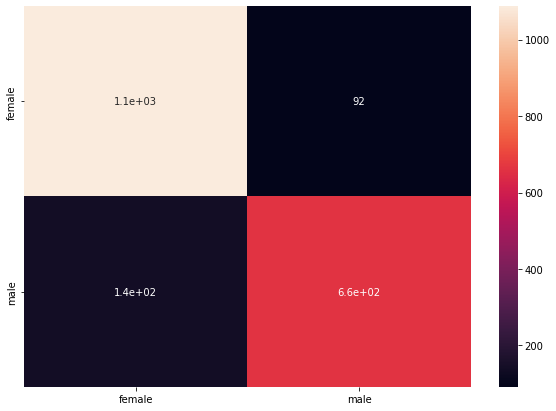

In [ ]:
draw_cf_matrix(cf_matrix, class_names)

#**VI.Predict**

In [ ]:
model = SVC(C=2, coef0=0.001, degree=1, gamma=0.01)
model.fit(X_train_pca, y_train)

SVC(C=2, coef0=0.001, degree=1, gamma=0.01)

In [ ]:
img1 = cv.imread("/content/drive/MyDrive/CS116_Nhóm/Data/TestPredict/Screenshot 2021-12-13 175620.png")
img2 = cv.imread("/content/drive/MyDrive/CS116_Nhóm/Data/TestPredict/Screenshot 2021-12-13 175701.png")
img3 = cv.imread("/content/drive/MyDrive/CS116_Nhóm/Data/TestPredict/Screenshot 2021-12-13 181924.png")
img4 = cv.imread("/content/drive/MyDrive/CS116_Nhóm/Data/TestPredict/Screenshot 2021-12-13 175943.png")
img5 = cv.imread("/content/drive/MyDrive/CS116_Nhóm/Data/TestPredict/Screenshot 2021-12-13 175957.png")
img6 = cv.imread("/content/drive/MyDrive/CS116_Nhóm/Data/TestPredict/063531.jpg (1).jpg")

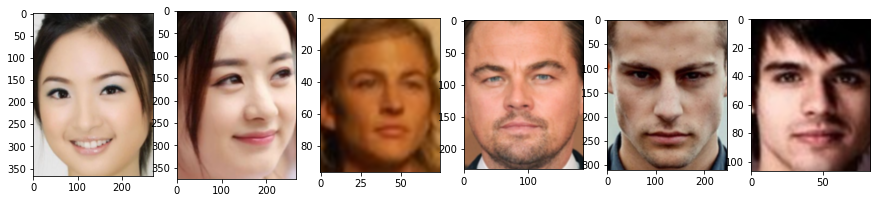

In [ ]:
VisualImages([img1, img2, img3, img4, img5, img6])

In [ ]:
def get_feat_img(img):
  img_t = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  img_t = cv.resize(img_t, (60,80)) 
  img_t = img_t/255
  img_t = img_t.flatten() 
  return img_t

In [ ]:
lst_img = [img1, img2, img3, img4, img5,img6]
lst_label = ["female", "female", "female", "male","male","male"]

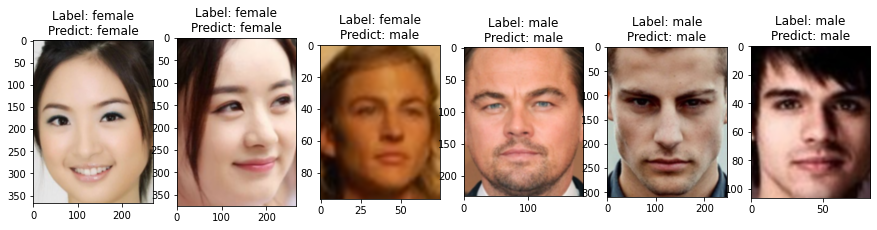

In [ ]:
t =[]
for img in lst_img:
  t.append(get_feat_img(img))
t = np.array(t)
t = pca.transform(np.array(t))
lst_pred = model.predict(t)
lst_title=[]
for i in range(len(lst_pred)):
  lst_title.append("Label: " + lst_label[i] + "\nPredict: " + lst_pred[i])

VisualImages(lst_img, lst_title)